<a href="https://colab.research.google.com/github/Kanchan20-Mandal/ML_module/blob/main/K_Means_%26_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means CLustering - Unsupervised Machine Learning algorithm
  Clusters are formed on basis of Elucidean distance calculated between each datapoint and centroid

## Evaluation metrics are :
Cluster formation:

Inertia:
intra cluster distance: within the cluster, the distance between datapoints should be minimal

inter cluster distance: in between the multiple clusters, the distance should be maximum

Silhoutee score:
the datapoint maintains minimum distance within other datapoints in the cluster and also this datapint maintains maximum distance with other datapoint of other cluster

In [1]:
%pip install yellowbrick

In [2]:
%pip install plotly nbformat

In [3]:
import pandas as pd
path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/Mall_Customers.csv"
df = pd.read_csv(path)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df.duplicated().sum()

np.int64(0)

### Define X features: These are the features on basis of which clustering should be performed

In [7]:
X=df.drop(columns=["CustomerID","Genre"])
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
X.columns=["Age","Income","Spending"]

In [9]:
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Data Preprocessing and Data cleaning

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [11]:
con_pipe=make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()

).set_output(transform="pandas")

In [12]:
con_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [13]:
X_pre=con_pipe.fit_transform(X)
X_pre.head()

,Age,Income,Spending
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


## Build the model: K- Means

In [14]:
from sklearn.cluster import KMeans

In [15]:
from yellowbrick.cluster import kelbow_visualizer

In [16]:
model=KMeans(n_clusters=5)
model.fit_predict(X_pre)

array([4, 4, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 3, 4, 2, 4,
       2, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 1, 4, 4, 4, 3, 3, 3, 3, 4, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

## Kelbow_visualizer

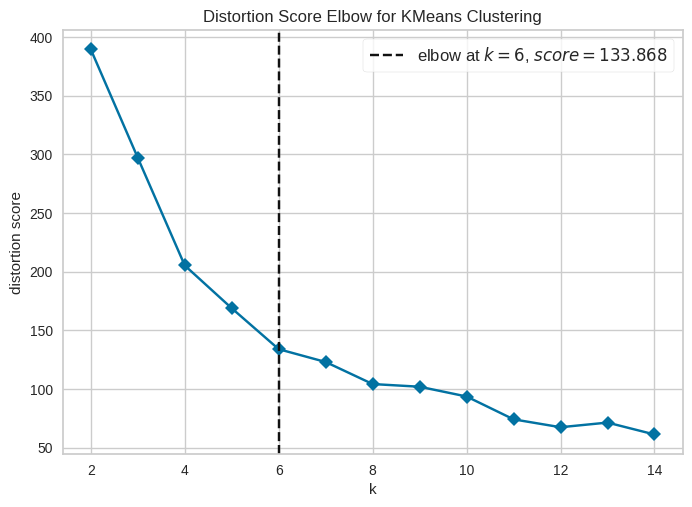

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:

base_model=KMeans()
Visualizer=kelbow_visualizer(base_model,X_pre,k=(2,15),timings=False)
Visualizer.show()

In [18]:
best_kmeans=KMeans(n_clusters=6)
clusters=best_kmeans.fit_predict(X_pre)
clusters

array([3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 0, 1, 0, 3, 0,
       1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 3, 0, 1, 0, 2, 3,
       2, 0, 2, 3, 3, 3, 2, 3, 3, 1, 2, 2, 2, 1, 3, 2, 1, 3, 1, 2, 1, 3,
       2, 1, 3, 3, 1, 2, 1, 1, 1, 3, 2, 2, 3, 2, 1, 2, 1, 2, 3, 2, 2, 3,
       3, 2, 1, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 1, 3, 2, 3, 1, 2, 1, 1,
       1, 3, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 2, 4, 3, 4, 2, 4, 1, 4, 5, 4,
       3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 5, 4, 2, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 2, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4], dtype=int32)

In [19]:
# Centroids of each cluster
best_kmeans.cluster_centers_

array([[-0.97439592, -1.32954532,  1.13217788],
       [ 1.65900664, -0.57610392, -0.5124446 ],
       [ 0.58678712, -0.23833795, -0.20289374],
       [-0.92220196, -0.44791825, -0.21740074],
       [-0.44191719,  0.99158305,  1.23950275],
       [ 0.1126274 ,  1.12370799, -1.33771584]])

In [20]:
X.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [21]:
X["Clusters"]=clusters
X.head()

,Age,Income,Spending,Clusters
0,19,15,39,3
1,21,15,81,0
2,20,16,6,3
3,23,16,77,0
4,31,17,40,3


In [22]:
for i in range(6):
  print(f"Details of cluster {i}")
  display(X[X["Clusters"]==i])
  print("-----------------------------------")

Details of cluster 0


,Age,Income,Spending,Clusters
1,21,15,81,0
3,23,16,77,0
5,22,17,76,0
7,23,18,94,0
9,30,19,72,0
11,35,19,99,0
13,24,20,77,0
15,22,20,79,0
17,20,21,66,0
19,35,23,98,0


-----------------------------------
Details of cluster 1


,Age,Income,Spending,Clusters
8,64,19,3,1
10,67,19,14,1
12,58,20,15,1
18,52,23,29,1
22,46,25,5,1
24,54,28,14,1
30,60,30,4,1
32,53,33,4,1
34,49,33,14,1
40,65,38,35,1


-----------------------------------
Details of cluster 2


,Age,Income,Spending,Clusters
26,45,28,32,2
28,40,29,31,2
36,42,34,17,2
42,48,39,36,2
44,49,39,28,2
46,50,40,55,2
50,49,42,52,2
54,50,43,45,2
55,47,43,41,2
56,51,44,50,2


-----------------------------------
Details of cluster 3


,Age,Income,Spending,Clusters
0,19,15,39,3
2,20,16,6,3
4,31,17,40,3
6,35,18,6,3
14,37,20,13,3
16,35,21,35,3
20,35,24,35,3
38,36,37,26,3
43,31,39,61,3
47,27,40,47,3


-----------------------------------
Details of cluster 4


,Age,Income,Spending,Clusters
123,39,69,91,4
125,31,70,77,4
127,40,71,95,4
129,38,71,75,4
131,39,71,75,4
133,31,72,71,4
135,29,73,88,4
137,32,73,73,4
139,35,74,72,4
141,32,75,93,4


-----------------------------------
Details of cluster 5


,Age,Income,Spending,Clusters
130,47,71,9,5
134,20,73,5,5
136,44,73,7,5
138,19,74,10,5
140,57,75,5,5
144,25,77,12,5
148,34,78,22,5
150,43,78,17,5
152,44,78,20,5
154,47,78,16,5


-----------------------------------


## Metrics

In [23]:
best_kmeans.inertia_

149.98535980121153

## Plot the clusters for this model

In [24]:
import plotly.express as px

In [25]:
fig=px.scatter_3d(data_frame=X,x="Age",y="Income",z="Spending",color="Clusters",symbol="Clusters")
fig.show()

## Hierarchal Clustering => Agglomerative Clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
X.head()

,Age,Income,Spending,Clusters
0,19,15,39,3
1,21,15,81,0
2,20,16,6,3
3,23,16,77,0
4,31,17,40,3


In [28]:
Xnew=X.drop(columns=["Clusters"])
Xnew.head()

,Age,Income,Spending
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [29]:
agc=AgglomerativeClustering(n_clusters=7)
agc.fit(Xnew)

AgglomerativeClustering(n_clusters=7)

In [30]:
l1=agc.labels_
l1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 5, 0, 5, 0, 5, 0,
       2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0])

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
silhouette_score(Xnew,l1)

np.float64(0.4262301125101286)

In [33]:
agc1=AgglomerativeClustering(n_clusters=4)
agc1.fit(Xnew)

AgglomerativeClustering(n_clusters=4)

In [34]:
l2=agc.labels_
l2

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 2, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 5, 0, 5, 0, 5, 0,
       2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 2, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 5, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0, 6, 0,
       6, 0])

In [35]:
silhouette_score(Xnew,l2)

np.float64(0.4262301125101286)

In [36]:
# create a range of data for k clusters
import numpy as np
ks=np.arange(start=2,stop=16,step=1)
ks

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [37]:
sil_scores=[]
for i in ks:
  # create a agglomerative model
  agc=AgglomerativeClustering(n_clusters=i)
  agc.fit(Xnew)
   # generate labels and store them
  lab=agc.labels_

  # generate silhoutte score
  ss=silhouette_score(Xnew,lab)
  # add the silhoutte scores to sil_scores
  sil_scores.append(ss)
print(sil_scores)


[np.float64(0.2992593203550994), np.float64(0.38141795042544546), np.float64(0.41037986351850747), np.float64(0.4401889024290193), np.float64(0.44308912983504156), np.float64(0.4262301125101286), np.float64(0.41028404899198817), np.float64(0.3663955117052502), np.float64(0.351820333160781), np.float64(0.3463610714830034), np.float64(0.3410778009986224), np.float64(0.3283549555627869), np.float64(0.3322538056675734), np.float64(0.32842591092474593)]


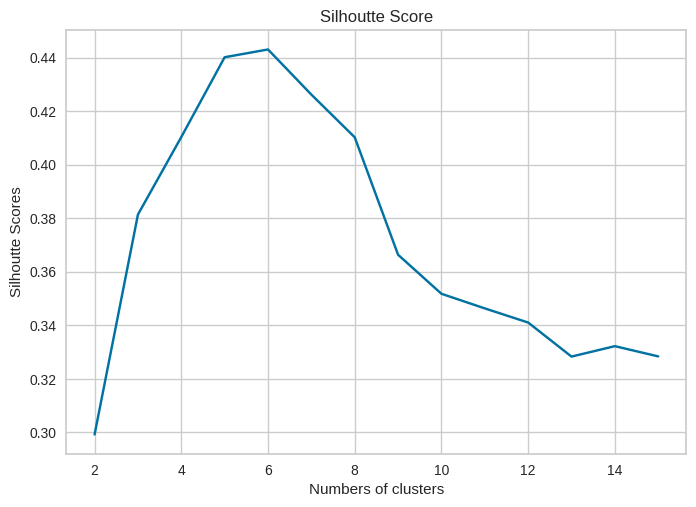

In [38]:
import matplotlib.pyplot as plt
plt.title("Silhoutte Score")
plt.plot(ks,sil_scores)
plt.xlabel("Numbers of clusters")
plt.ylabel("Silhoutte Scores")
plt.show()

## For 6 clusters, we are getting the maximum silhoutte score.

In [39]:
final_agc=AgglomerativeClustering(n_clusters=6)
final_agc.fit(Xnew)

AgglomerativeClustering(n_clusters=6)

In [40]:
final_agc.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [41]:
Xnew["Clusters"]=final_agc.labels_
Xnew.head()

,Age,Income,Spending,Clusters
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


## Dendrogram

<ipython-input-45-40b48ee868e4>:5: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



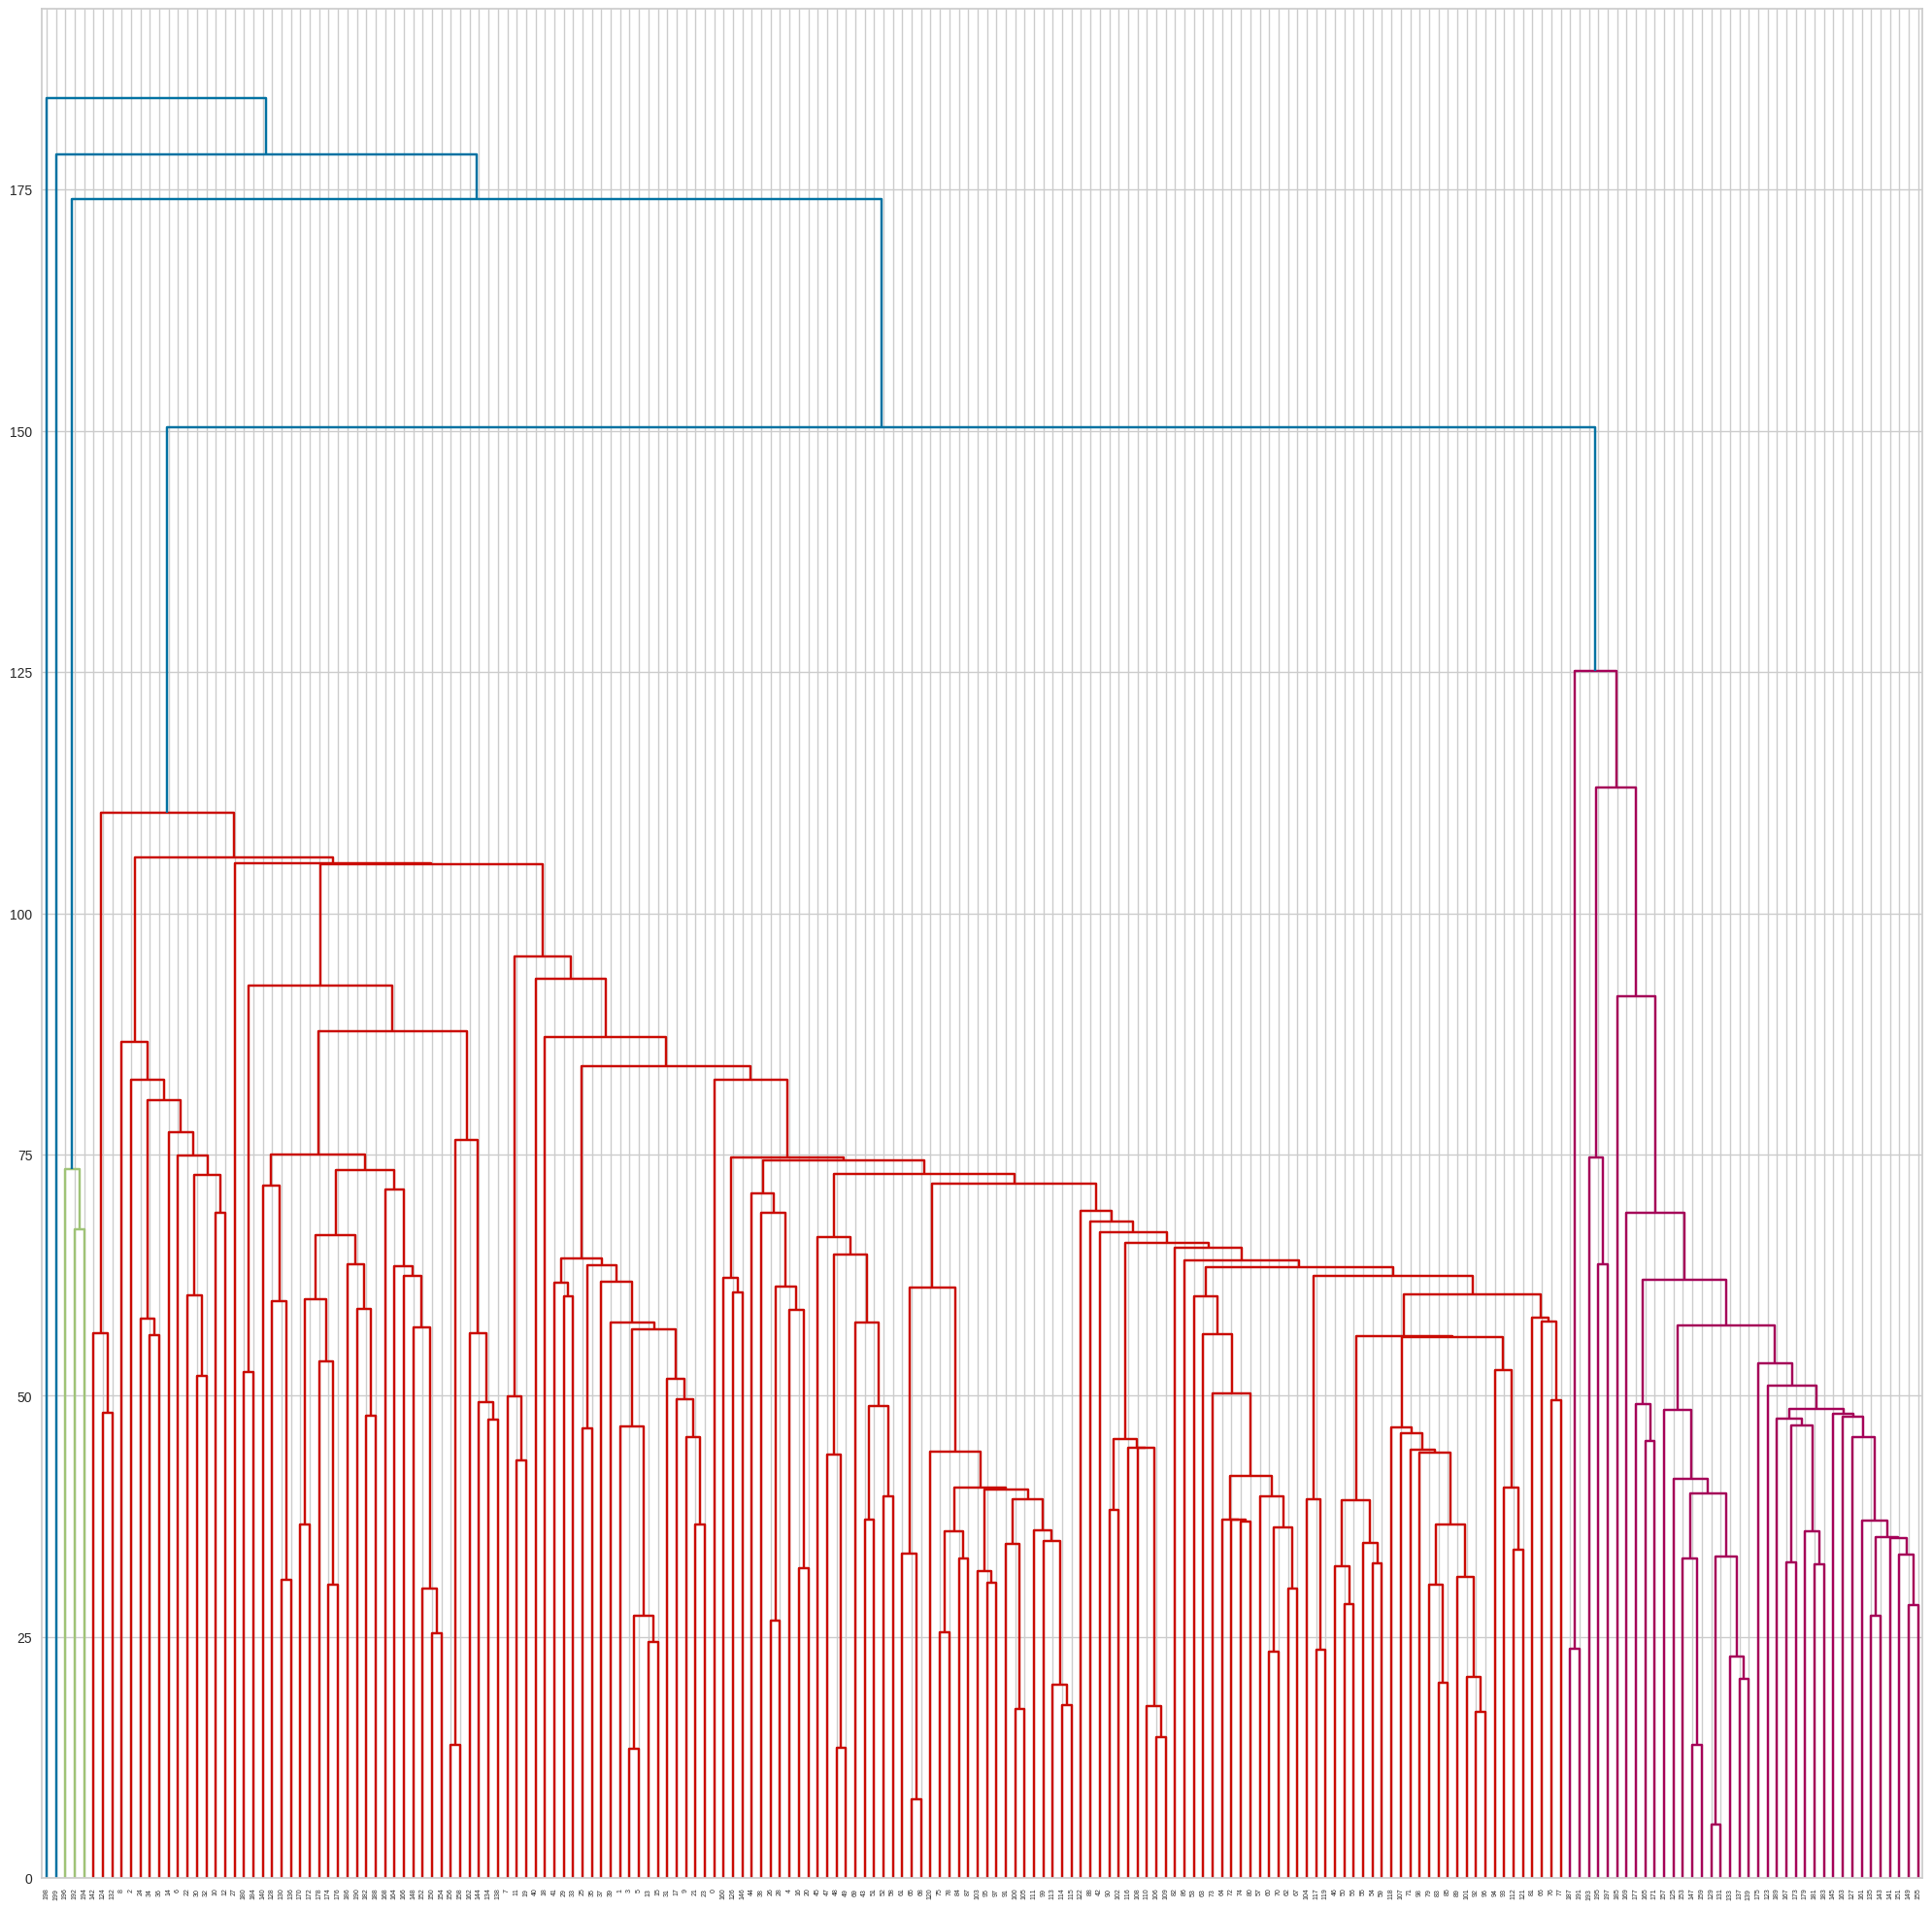

In [45]:
plt.figure(figsize=(25,25))
from scipy.spatial import distance_matrix
DM=distance_matrix(Xnew,Xnew)
from scipy.cluster.hierarchy import linkage
linkages=linkage(DM)
from scipy.cluster.hierarchy import dendrogram
Q=dendrogram(linkages)
